In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Label-to-Integer Mapping: {'Sushi': 0, 'Pizza': 1, 'Shawarma': 2}
Epoch 0 for LR 0.1, Loss: 1.0969
Epoch 100 for LR 0.1, Loss: 0.6997
Epoch 200 for LR 0.1, Loss: 0.5736
Epoch 300 for LR 0.1, Loss: 0.5042
Epoch 400 for LR 0.1, Loss: 0.4582
Epoch 500 for LR 0.1, Loss: 0.4244
Epoch 600 for LR 0.1, Loss: 0.3981
Epoch 700 for LR 0.1, Loss: 0.3769
Epoch 800 for LR 0.1, Loss: 0.3591
Epoch 900 for LR 0.1, Loss: 0.3440
Epoch 0 for LR 0.5, Loss: 0.3308
Epoch 100 for LR 0.5, Loss: 0.2834
Epoch 200 for LR 0.5, Loss: 0.2526
Epoch 300 for LR 0.5, Loss: 0.2300
Epoch 400 for LR 0.5, Loss: 0.2123
Epoch 500 for LR 0.5, Loss: 0.1978
Epoch 600 for LR 0.5, Loss: 0.1856
Epoch 700 for LR 0.5, Loss: 0.1751
Epoch 800 for LR 0.5, Loss: 0.1659
Epoch 900 for LR 0.5, Loss: 0.1577
Epoch 0 for LR 1, Loss: 0.1504
Epoch 100 for LR 1, Loss: 0.1378
Epoch 200 for LR 1, Loss: 0.1273
Epoch 300 for LR 1, Loss: 0.1184
Epoch 400 for LR 1, Loss: 0.1107
Epoch 500 for LR 1, Loss: 0.1040
Epoch 600 for LR 1, Loss: 0.0981
Epoch 700

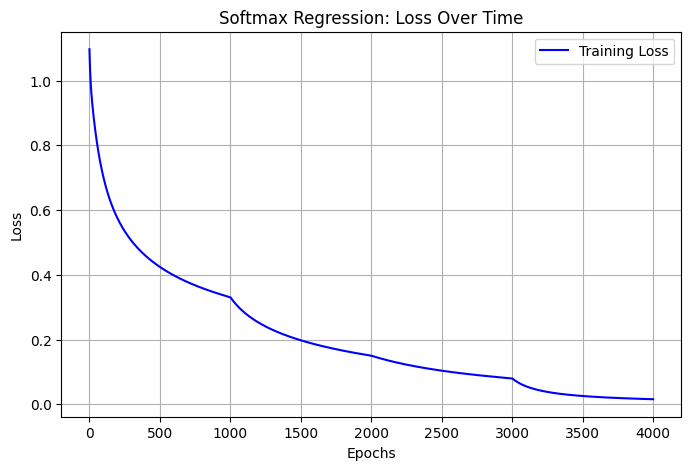

Test Accuracy: 74.77%


In [16]:
# Load Data
file_path = "/content/clean_results.csv"  # path to data
data = pd.read_csv(file_path, delimiter=',', skiprows=1)

# last col is target
X = data.iloc[:, :-1]  # features
t = data.iloc[:, -1]   # targets

# categorical target labels into numerical values
unique_labels = list(set(t))
label_to_int = {label: idx for idx, label in enumerate(unique_labels)}
int_to_label = {idx: label for label, idx in label_to_int.items()}
t_encoded = np.array([label_to_int[label] for label in t])

print("Label-to-Integer Mapping:", label_to_int)

# one-hot encode target variable
num_classes = len(unique_labels)
t_one_hot = np.eye(num_classes)[t_encoded]
# print("One-Hot Encoded Targets:")
# print(t_one_hot)

#  categorical features into numerical
X = pd.get_dummies(X)

# ormalize numerical features
X = X.astype(float)  # Ensure numerical data
X_min = X.min()
X_max = X.max()
X_scaled = (X - X_min) / (X_max - X_min)

# convert DataFrame to NumPy arrays
X_scaled = X_scaled.to_numpy()

# split data: 60% train, 40% test
total_samples = len(X_scaled)
train_end = int(total_samples * 0.60)

X_train, X_test = X_scaled[:train_end], X_scaled[train_end:]
t_train, t_test = t_one_hot[:train_end], t_one_hot[train_end:]

# Initialize Parameters
num_features = X_train.shape[1]
W = np.random.randn(num_features, num_classes) * 0.01  # random weight to begin
b = np.zeros((1, num_classes))

# functionsssss for softmax and loss
def softmax(z):
    z -= np.max(z, axis=1, keepdims=True)  # Stability fix
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def compute_loss(t_true, t_pred):
    m = t_true.shape[0]
    sigmoid = 1e-15  # sigma sigma boy sigm aboy sigma boy
    return -np.sum(t_true * np.log(t_pred + sigmoid)) / m

# hyperpragmaters
learning_rates = [0.1, 0.5, 1, 10]
epochs = 1000
loss_history = []

########### GET RID OF THE NaN ROWS #####################
nan_mask = ~np.isnan(X_train).any(axis=1)
X_train, t_train = X_train[nan_mask], t_train[nan_mask]

assert not np.isnan(X_train).any(), "NaN found in X_train!"
assert not np.isnan(t_train).any(), "NaN found in t_train!"
###########################################################

# training
for learning_rate in learning_rates:
  for epoch in range(epochs):
      # Forward Pass
      logits = np.dot(X_train, W) + b
      t_pred = softmax(logits)

      # Compute Loss
      loss = compute_loss(t_train, t_pred)
      loss_history.append(loss)

      # Backward Pass
      m = X_train.shape[0]
      dW = (1 / m) * np.dot(X_train.T, (t_pred - t_train))  # gradient w.r.t weights
      db = (1 / m) * np.sum(t_pred - t_train, axis=0, keepdims=True)  # gradient w.r.t bias

      # Update Parameters
      W -= learning_rate * dW
      b -= learning_rate * db

      # Print Progress
      if epoch % 100 == 0:
          print(f"Epoch {epoch} for LR {learning_rate}, Loss: {loss:.4f}")

# Loss Over Epochs
plt.figure(figsize=(8, 5))
plt.plot(loss_history, label="Training Loss", color="b")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Softmax Regression: Loss Over Time")
plt.legend()
plt.grid()
plt.show()

# Prediction Function
def predict(X, W, b):
    logits = np.dot(X, W) + b
    t_pred = softmax(logits)
    return np.argmax(t_pred, axis=1)  # highest probability

# Evaluate Model
t_test_pred = predict(X_test, W, b)
t_test_true = np.argmax(t_test, axis=1)
test_accuracy = np.mean(t_test_pred == t_test_true)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")